In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [4]:
cars = pd.read_csv("./cars.txt", header=None)

In [5]:
cars.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
iris = load_iris()

In [11]:
X_train = iris.data[:, :2]
y_train = iris.target

In [12]:
estimator = [SVC(kernel="linear"), SVC(kernel="rbf"),SVC(kernel="poly"), LinearSVC()]

In [15]:
# 图片背景点

x_min, x_max = X_train[:, 0].min()-1, X_train[:,0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:,1].max()+1

x, y = np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x, y)
xy_test = np.c_[xx.ravel(),yy.ravel()]

In [20]:
from matplotlib.colors import ListedColormap

colors = ListedColormap(["#ff00aa", "#00ffaa", "aaff00"])

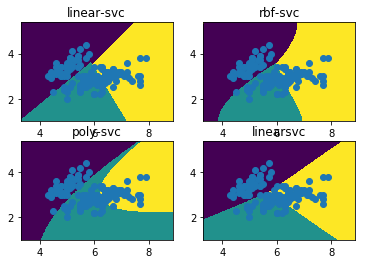

In [21]:
titles = ["linear-svc", "rbf-svc", "poly-svc", "linearsvc"]

for i, clf in enumerate(estimator):
    # 训练
    clf.fit(X_train, y_train)
    # 预测
    y_ = clf.predict(xy_test)
    
    z = y_.reshape(yy.shape)
    
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    
    plt.pcolormesh(xx, yy, z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], cmap=colors)
    